<a href="https://colab.research.google.com/github/zahid-bracu/buet-business-analytics/blob/main/Lecture_6_Data_Descriptive_Statistics_GroupBy_Correlation_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descriptive Statistics
Python Descriptive Statistics process describes the basic features of data in a study suchas1. Mean
2. Standard Deviation
3. Mode
4. Skewness
5. Median

#Load Data set & Data Preprocessing

In [ ]:
from google.colab import drive #importing google drive library from google colab
drive.mount('/content/drive') #mounting the google drive
import pandas as pd #importing panda library
file_path = "/content/drive/My Drive/Datas/e-commerce-data.xlsx" #Create file path
#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
fact_table = pd.read_excel(file_path, sheet_name='Fact_table', engine='openpyxl')
#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
item_dim = pd.read_excel(file_path, sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(file_path, sheet_name='Coustomer_dim', engine='openpyxl')
time_dim= pd.read_excel(file_path, sheet_name='Time_dim', engine='openpyxl')
store_dim= pd.read_excel(file_path, sheet_name='Store_dim', engine='openpyxl')
trans_dim= pd.read_excel(file_path, sheet_name='Trans_dim', engine='openpyxl')
#Check number of null data in each column
fact_table.isnull().sum()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


payment_key       0
coustomer_key     0
time_key          0
item_key          0
store_key         0
quantity          3
unit             47
unit_price        1
total_price       5
dtype: int64

In [ ]:
# Mode imputation
mode_value = fact_table['unit'].mode()[0]  # Calculate the mode
fact_table['unit'].fillna(mode_value, inplace=True)  # Fill missing values with mode

mode_value = fact_table['unit_price'].mode()[0]  # Calculate the mode
fact_table['unit_price'].fillna(mode_value, inplace=True)  # Fill missing values with mode


mode_value = fact_table['total_price'].mode()[0]  # Calculate the mode
fact_table['total_price'].fillna(mode_value, inplace=True)  # Fill missing values with mode

mode_value = fact_table['quantity'].mode()[0]  # Calculate the mode
fact_table['quantity'].fillna(mode_value, inplace=True)  # Fill missing values with mode

fact_table.isnull().sum()

payment_key      0
coustomer_key    0
time_key         0
item_key         0
store_key        0
quantity         0
unit             0
unit_price       0
total_price      0
dtype: int64

#Descriptive Statistics

##Mean
* Calculating mean of selected column
* Calculate the mean value of quantity and unit price of the fact table,

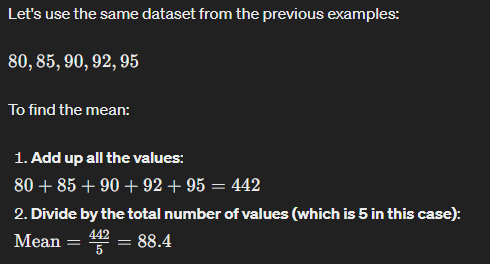

In [ ]:
mean_value=fact_table[['quantity','unit_price']].mean()
print("Mean value : ")
mean_value

Mean value : 


quantity       5.9739
unit_price    17.4552
dtype: float64

##Standard Deviation
* Calculate the standard deviation of the unit price of the item table,


Standard deviation is a measure of the amount of variation or dispersion in a set of values. It tells us how spread out the numbers in a data set are around the mean.

Here's an example calculation of standard deviation:

Let's say we have a data set of exam scores: 75, 80, 85, 90, 95.

* Calculate the mean (average) of the data set: Mean = (75 + 80 + 85 + 90 + 95) / 5 = 85.
* Calculate the difference between each data point and the mean: Differences: -10, -5, 0, 5, 10.
* Square each difference: Squares: 100, 25, 0, 25, 100.
* Calculate the mean of the squared differences: Mean of squares = (100 + 25 + 0 + 25 + 100) / 5 = 50.
* Take the square root of the mean of the squared differences: Standard deviation = √50 ≈ 7.07.

So, the standard deviation of the exam scores is approximately 7.07.

In [ ]:
std_value=fact_table['unit_price'].std()
std_value

8.535126114931154

##Mode
* Find the mode value/most common value of the customer key in the fact table.

* mode refers to the value or values that occur most frequently in a dataset. Mode is commonly used with categorical data, where data points are grouped into categories rather than being numerical values.

* For example, consider a dataset representing the favorite colors of a group of people:Red, Blue, Green, Blue, Red, Yellow, Blue
In this dataset, "Blue" occurs most frequently, so the mode of this dataset is "Blue".

In [ ]:
mode_value=fact_table['coustomer_key'].mode()
mode_value

0    C004608
Name: coustomer_key, dtype: object

##Median Value
* Find the middle value of the data set
* For example, consider the dataset [3, 6, 1, 9, 12, 4, 7]. When these values are arranged in ascending order, it becomes [1, 3, 4, 6, 7, 9, 12]. The median in this case is 6, because it's the middle value.

* If the dataset had been [3, 6, 1, 9, 12, 4], then the median would be (4 + 6) / 2 = 5, because 4 and 6 are the two middle values.

In [ ]:
median_value=fact_table['unit_price'].median()
median_value

16.0

##Skewness

In [ ]:
skew_value = fact_table[['quantity']].skew()
skew_value

quantity    0.005529
dtype: float64

#Group By

##Group by & Sum over 1 column

In [ ]:
payment_key_sum_group =fact_table.groupby(['payment_key']).sum()
payment_key_sum_group['unit_price'].head()

payment_key
P001    4488.25
P002    4783.75
P003    4609.75
P004    4685.25
P005    4476.25
Name: unit_price, dtype: float64

##Group by & Reset Index & Sum over 1 column

In [ ]:
payment_key_sum_group =fact_table.groupby(['payment_key']).sum().reset_index()
payment_key_sum_group['unit_price'].head()

0    4488.25
1    4783.75
2    4609.75
3    4685.25
4    4476.25
Name: unit_price, dtype: float64

##Group & Sum & Reset_index over 2 columns

In [ ]:
payment_item_key=fact_table.groupby(['payment_key', 'item_key']).sum().reset_index()
selected_columns = ['payment_key','unit_price','total_price']
payment_item_key[selected_columns].head()

,payment_key,unit_price,total_price
0,P001,13.50,67.50
1,P001,6.75,54.00
2,P001,13.50,47.25
3,P001,16.25,65.00
4,P001,16.25,81.25


#Groupby & multiple aggregations

In [ ]:
payment_key_max_min =fact_table.groupby(['payment_key']).aggregate(['min','max']).reset_index()
selected_columns = ['payment_key','unit_price','total_price']
payment_key_max_min[selected_columns].head()

payment_key unit_price       total_price       
                     min   max         min    max
0        P001       6.00  48.0        6.00  506.0
1        P002       6.00  55.0        8.00  605.0
2        P003       6.75  48.0        6.75  528.0
3        P004       6.00  55.0        6.75  583.0
4        P005       6.00  55.0        6.75  530.0

##Groupby & multiple aggregations over different columns

In [ ]:
payment_coustermer_key =fact_table.groupby(['payment_key', 'coustomer_key']).aggregate({'quantity':'sum','unit_price':['min','max']}).reset_index()
payment_coustermer_key

payment_key coustomer_key quantity unit_price       
                                    sum        min    max
0           P001       C000005      4.0      14.00  14.00
1           P001       C000020     11.0      20.00  20.00
2           P001       C000045      5.0      16.00  16.00
3           P001       C000073      1.0       6.00   6.00
4           P001       C000091      1.0      20.00  20.00
...          ...           ...      ...        ...    ...
9847        P039       C009120      4.0       6.75   6.75
9848        P039       C009127      6.0      15.00  15.00
9849        P039       C009132      4.0      24.00  24.00
9850        P039       C009156     10.0      11.00  11.00
9851        P039       C009167      8.0      11.50  11.50

[9852 rows x 5 columns]

#Merge Dataframe

##Merge Two Tables

In [ ]:
fact_table_trans_dim=fact_table.merge(trans_dim)

##Merge Two Tables based on a key

In [ ]:
fact_table_store_dim=pd.merge(fact_table,store_dim,on='store_key')